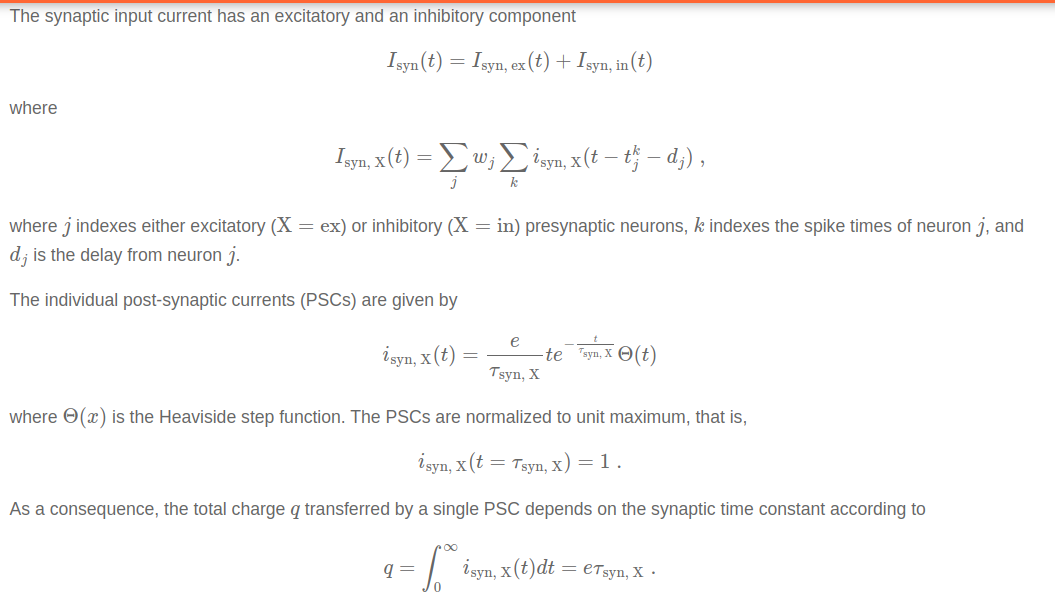

In [1]:
#Imports
import nest
import matplotlib.pyplot as plt
from params import pyr_hcamp_deco2012



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Sep 28 2023 11:53:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
#Intialisation of Params
nest.rng_seed = 1

v_e = 5
w = 1
g_e = 1
connection_weight = v_e * g_e * w

simulation_runtime = 300
poisson_rate = 17

In [3]:
neuron = nest.Create('iaf_psc_alpha')
neuron.set(pyr_hcamp_deco2012.params)

poisson_input = nest.Create('poisson_generator')
poisson_input.set(rate=poisson_rate)

<p>An example of the alpha shape of an incoming current from one presynaptic poisson input</p>


Jul 01 13:59:30 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Jul 01 13:59:30 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 300
    Number of OpenMP threads: 1
    Not using MPI

Jul 01 13:59:30 SimulationManager::run [Info]: 
    Simulation finished.


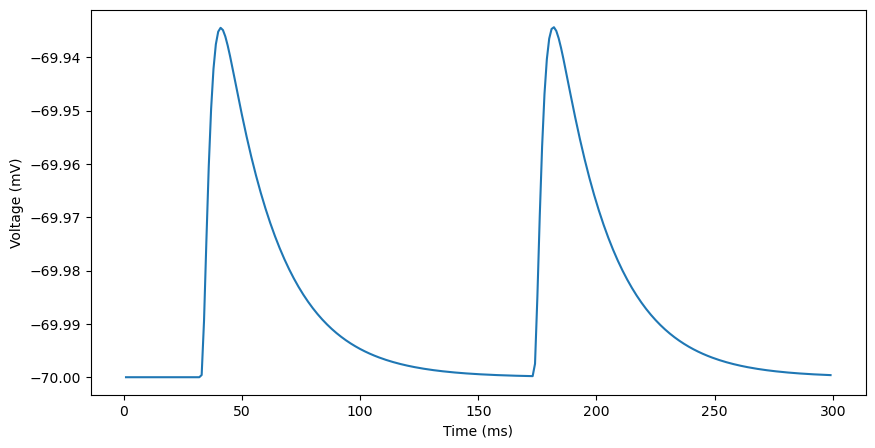

In [4]:
vm_recorder = nest.Create('multimeter')
vm_recorder.set(record_from=['V_m'])

Isyn_recorder = nest.Create('multimeter')
Isyn_recorder.set(record_from=['I_syn_ex'])

nest.Connect(Isyn_recorder, neuron)
nest.Connect(vm_recorder, neuron)
nest.Connect(poisson_input, neuron, syn_spec={'weight': connection_weight})

nest.Simulate(simulation_runtime)

dmm_events = vm_recorder.get()['events']
dmm_events2 = Isyn_recorder.get()['events']
Vms = dmm_events['V_m']
Isyns = dmm_events2['I_syn_ex']
ts = dmm_events['times']

fig= plt.figure()

fig.set_figwidth(10)
fig.set_figheight(5)
plt.plot(ts, Vms)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
nest.ResetKernel()


Jul 01 14:15:40 NodeManager::prepare_nodes [Info]: 
    Preparing 5 nodes for simulation.

Jul 01 14:15:40 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 5
    Simulation time (ms): 300
    Number of OpenMP threads: 1
    Not using MPI

Jul 01 14:15:40 SimulationManager::run [Info]: 
    Simulation finished.


(-13.9, 313.9)

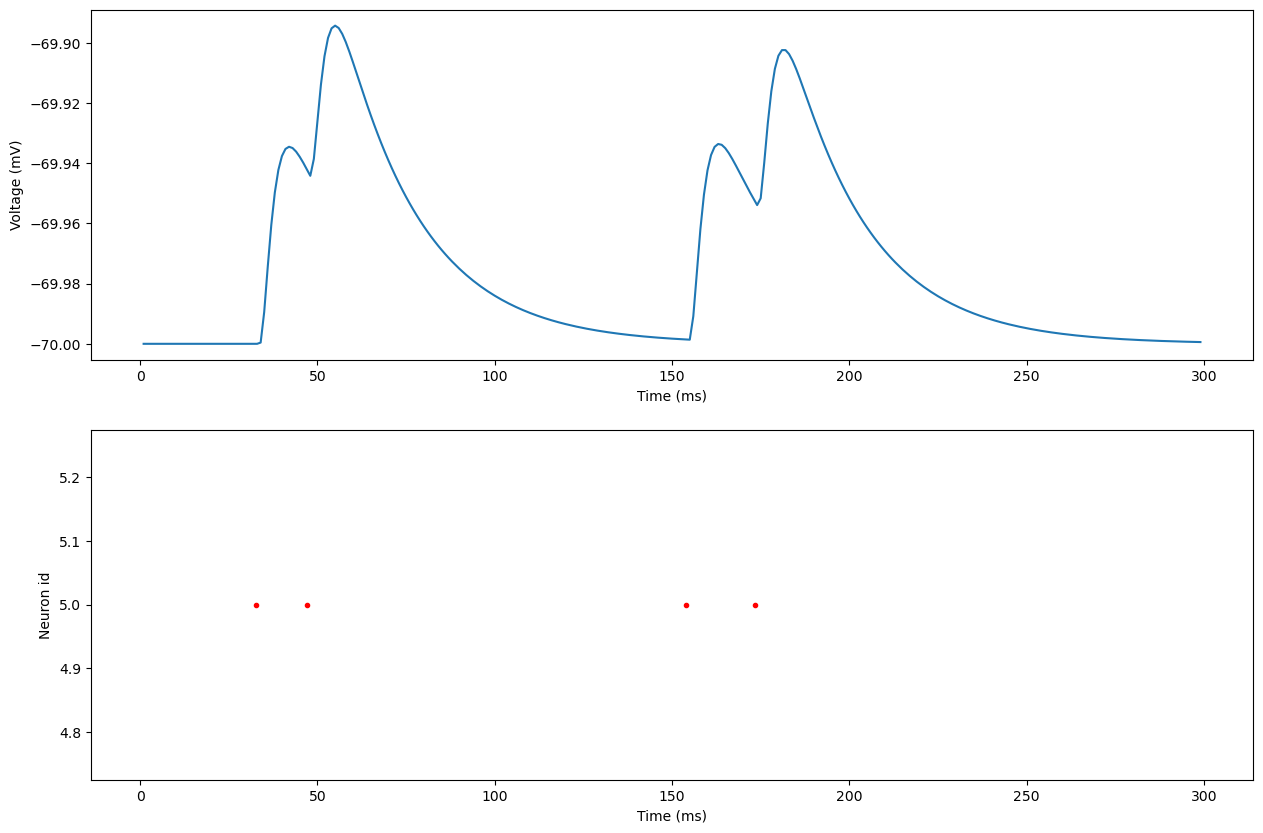

In [4]:
vm_recorder = nest.Create('multimeter')
vm_recorder.set(record_from=['V_m'])

spike_recorder = nest.Create('spike_recorder')

parrot_neuron = nest.Create('parrot_neuron')

nest.Connect(vm_recorder, neuron)
nest.Connect(poisson_input, parrot_neuron)
nest.Connect(parrot_neuron, neuron, syn_spec={'weight': connection_weight})
nest.Connect(parrot_neuron, spike_recorder)

nest.Simulate(simulation_runtime)

dmm_events = vm_recorder.get()['events']
spike_events = spike_recorder.get()['events']
Vms = dmm_events['V_m']
spikes = spike_events['senders']
spike_ts = spike_events['times']
ts = dmm_events['times']

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figwidth(15)
fig.set_figheight(10)
ax1.plot(ts, Vms)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Voltage (mV)')
ax2.plot(spike_ts, spikes, '.', color='red')
neuron.set(pyr_hcamp_deco2012.params)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Neuron id')
ax2.set_xlim(ax1.get_xlim())

In [ ]:
nest.ResetKernel()